In [3]:
import sys
sys.path.append("..")


from experiments.plt_pab_fae import plt_fab_fae
from protocol.BB84EveTrainableProtocol import BB84EveTrainableProtocol
from protocol.BB84TrainableProtocol import BB84TrainableProtocol
from protocol.BB84Protocol import BB84Protocol
from protocol.connection_elements.MultiQubitQCLEve import MultiQubitQCLEve
from protocol.connection_elements.error_correction.ThreeQubitCorrection import ThreeQubitBitFlipEncoder, ThreeQubitBitFlipDecoder



No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.
/home/wpalka/.virtualenvs/BB84-QCL-error-correction/lib/python3.12/site-packages/qiskit/circuit/quantumcircuit.py:3428: RuntimeWarning: Cregbundle set to False since an instruction needs to refer to individual classical wire
  return circuit_drawer(


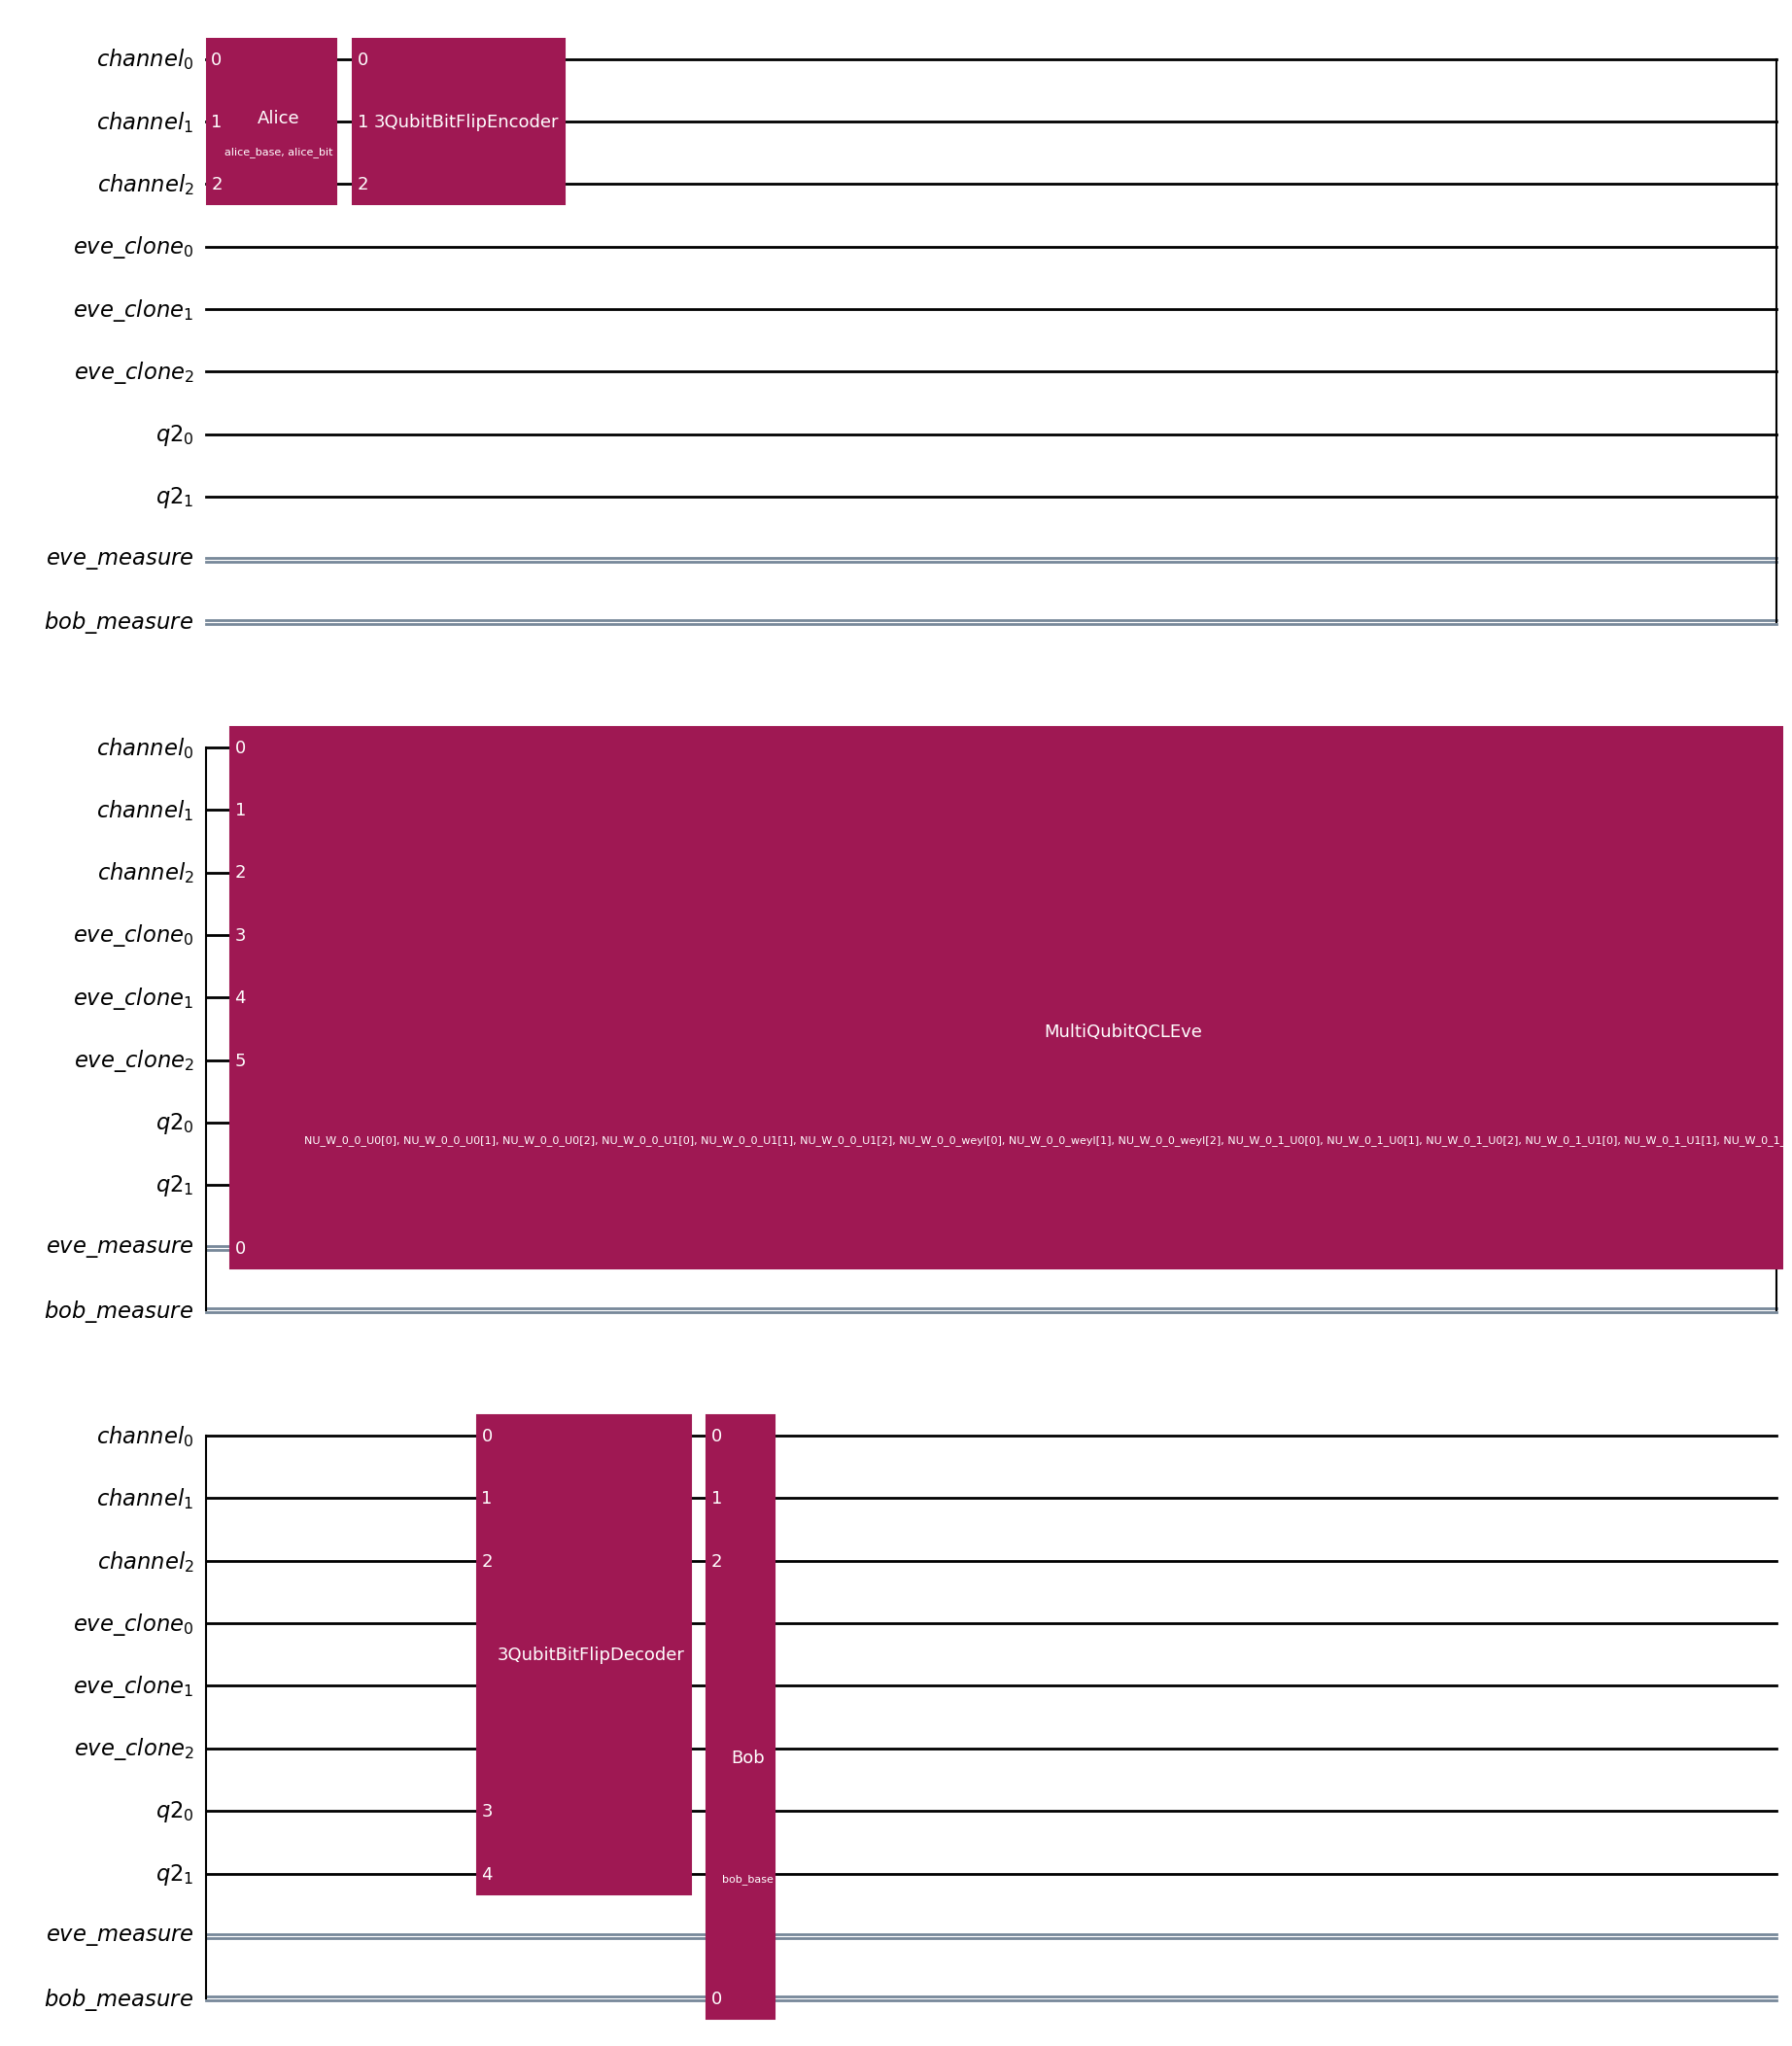

In [4]:
layers = [ThreeQubitBitFlipEncoder(), ThreeQubitBitFlipDecoder()]
eve = MultiQubitQCLEve()

eve_protocol = BB84EveTrainableProtocol(n_bits=512, elements=[layers[0], eve, layers[1]], channel_size=3,
                                        seed=0, alpha=1, learning_rate=0.05)

qc, _ = eve_protocol.qc_with_ctx()
qc.draw("mpl", expr_len=3)

In [5]:
def train_eve():
    bob_qber, eve_qber = [], []
    qber = eve_protocol.run()
    bob_qber.append(qber['bob_qber'])
    eve_qber.append(qber['eve_qber'])
    print(f'start QBER: {qber}')
    for epoch in range(50):
        loss = eve_protocol.train()
        qber = eve_protocol.run()
        bob_qber.append(qber['bob_qber'])
        eve_qber.append(qber['eve_qber'])
        if epoch % 5 == 0 or epoch == 49:
            print(f'epoch: {epoch}, loss: {loss}, QBER: {qber}')
    return bob_qber, eve_qber

# Krok 2 - trenowanie tylko Eve, warstwy Alice i Boba zamrożone
Uczymy samą Eve, docelowa dokładność Boba to 0.8. Startujemy od parametrów Alice i Boba wytrenowanych w poprzednim kroku i Eve jako identyczność.

In [6]:
params = eve_protocol.get_all_parameters()
for p in eve.trainable_parameters():
    k = p.name
    params[k] = 0

eve_protocol.set_parameters(params)


No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.
/home/wpalka/.virtualenvs/BB84-QCL-error-correction/lib/python3.12/site-packages/qiskit_machine_learning/connectors/torch_connector.py:378: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self._weights.data = torch.tensor(initial_weights, dtype=torch.float)


In [7]:
eve_protocol.f_value = 0.8
b_q, e_q = train_eve()

start QBER: {'bob_qber': np.float64(0.2867647058823529), 'eve_qber': np.float64(0.5294117647058824)}



KeyboardInterrupt



<module 'matplotlib.pyplot' from '/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

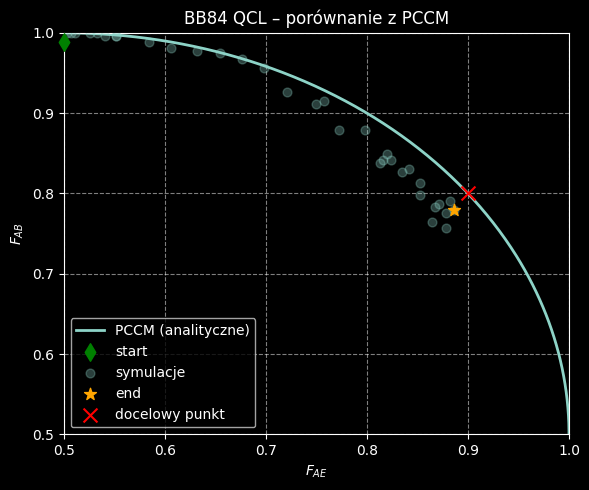

In [27]:
plt_fab_fae(b_q, e_q, 0.8)

In [37]:
print("All parameters:", eve_protocol.get_all_parameters())

All parameters: {'NU_W_0_0_U0[0]': np.float32(-0.36278984), 'NU_W_0_0_U0[1]': np.float32(0.35069796), 'NU_W_0_0_U0[2]': np.float32(0.27843285), 'NU_W_0_0_U1[0]': np.float32(1.0279669), 'NU_W_0_0_U1[1]': np.float32(-0.5163962), 'NU_W_0_0_U1[2]': np.float32(-0.5059375), 'NU_W_0_0_weyl[0]': np.float32(0.9807007), 'NU_W_0_0_weyl[1]': np.float32(1.0431337), 'NU_W_0_0_weyl[2]': np.float32(0.7779182), 'NU_W_0_1_U0[0]': np.float32(0.9675189), 'NU_W_0_1_U0[1]': np.float32(-0.4670279), 'NU_W_0_1_U0[2]': np.float32(2.4279019e-09), 'NU_W_0_1_U1[0]': np.float32(-0.038741805), 'NU_W_0_1_U1[1]': np.float32(0.9512137), 'NU_W_0_1_U1[2]': np.float32(-1.99349e-09), 'NU_W_0_1_weyl[0]': np.float32(-0.019185869), 'NU_W_0_1_weyl[1]': np.float32(0.006766543), 'NU_W_0_1_weyl[2]': np.float32(-0.45998082), 'NU_W_1_0_U0[0]': np.float32(0.38765946), 'NU_W_1_0_U0[1]': np.float32(0.22361976), 'NU_W_1_0_U0[2]': np.float32(0.06746475), 'NU_W_1_0_U1[0]': np.float32(0.363606), 'NU_W_1_0_U1[1]': np.float32(-0.53085977), 

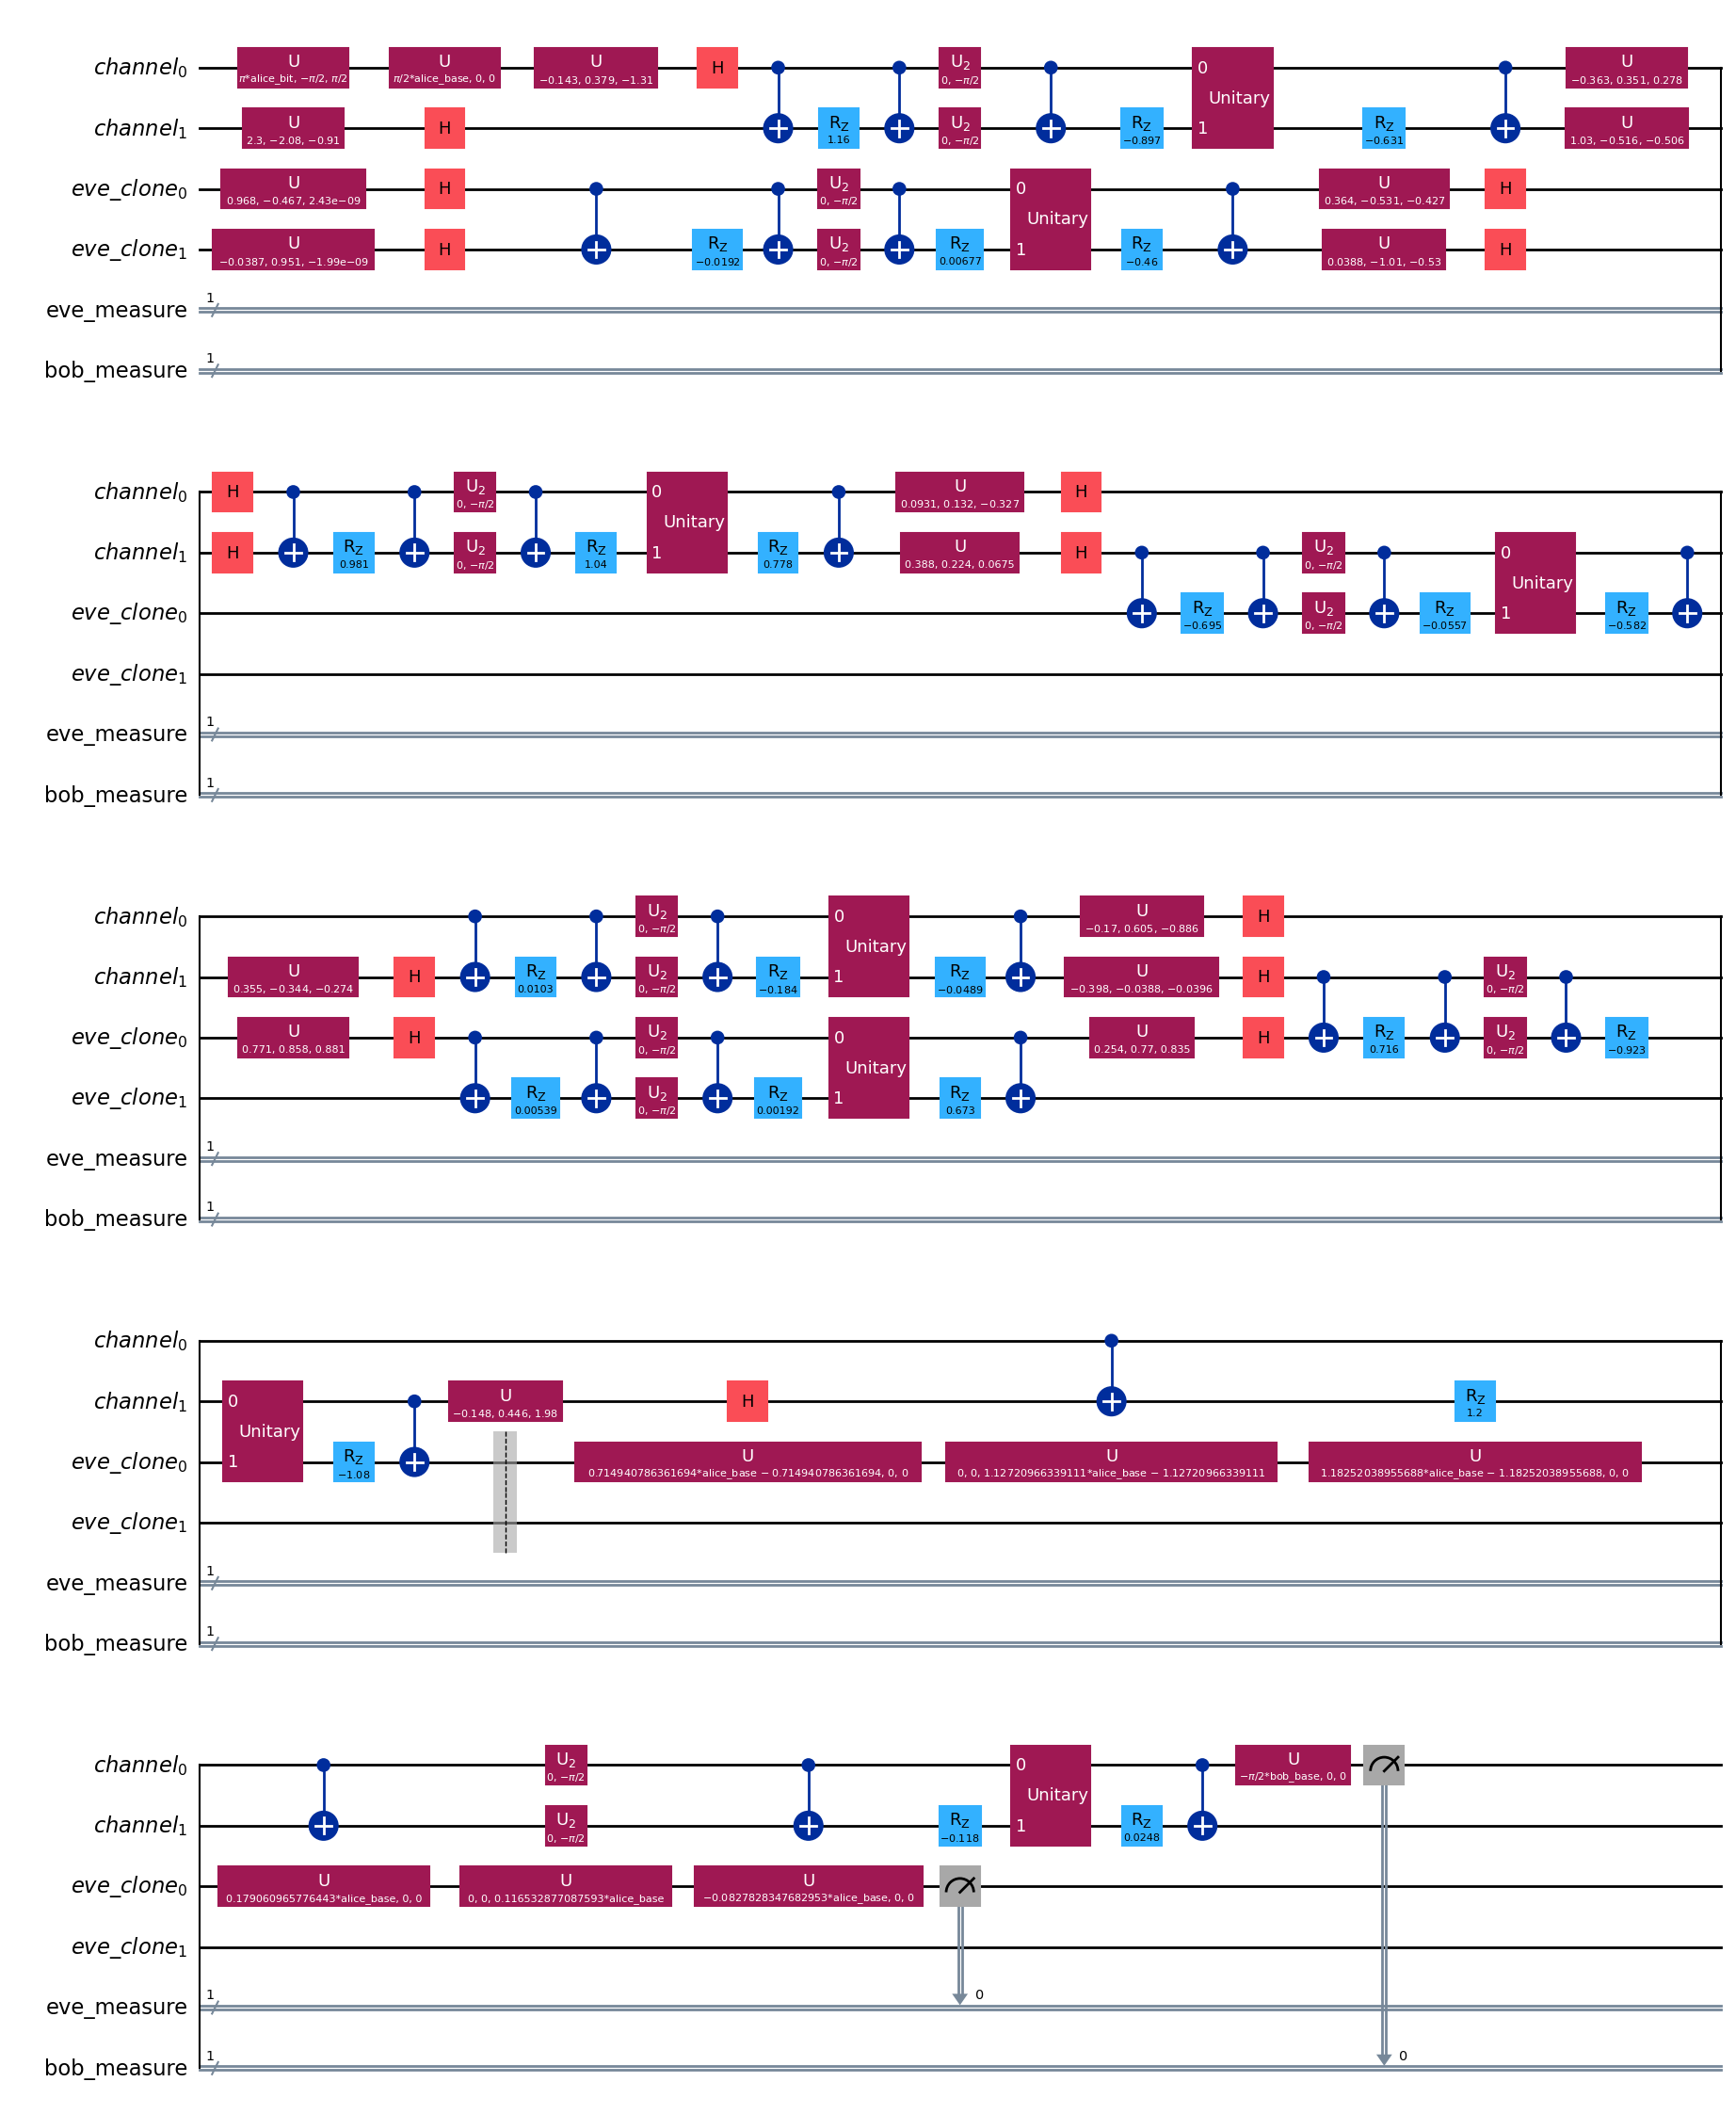

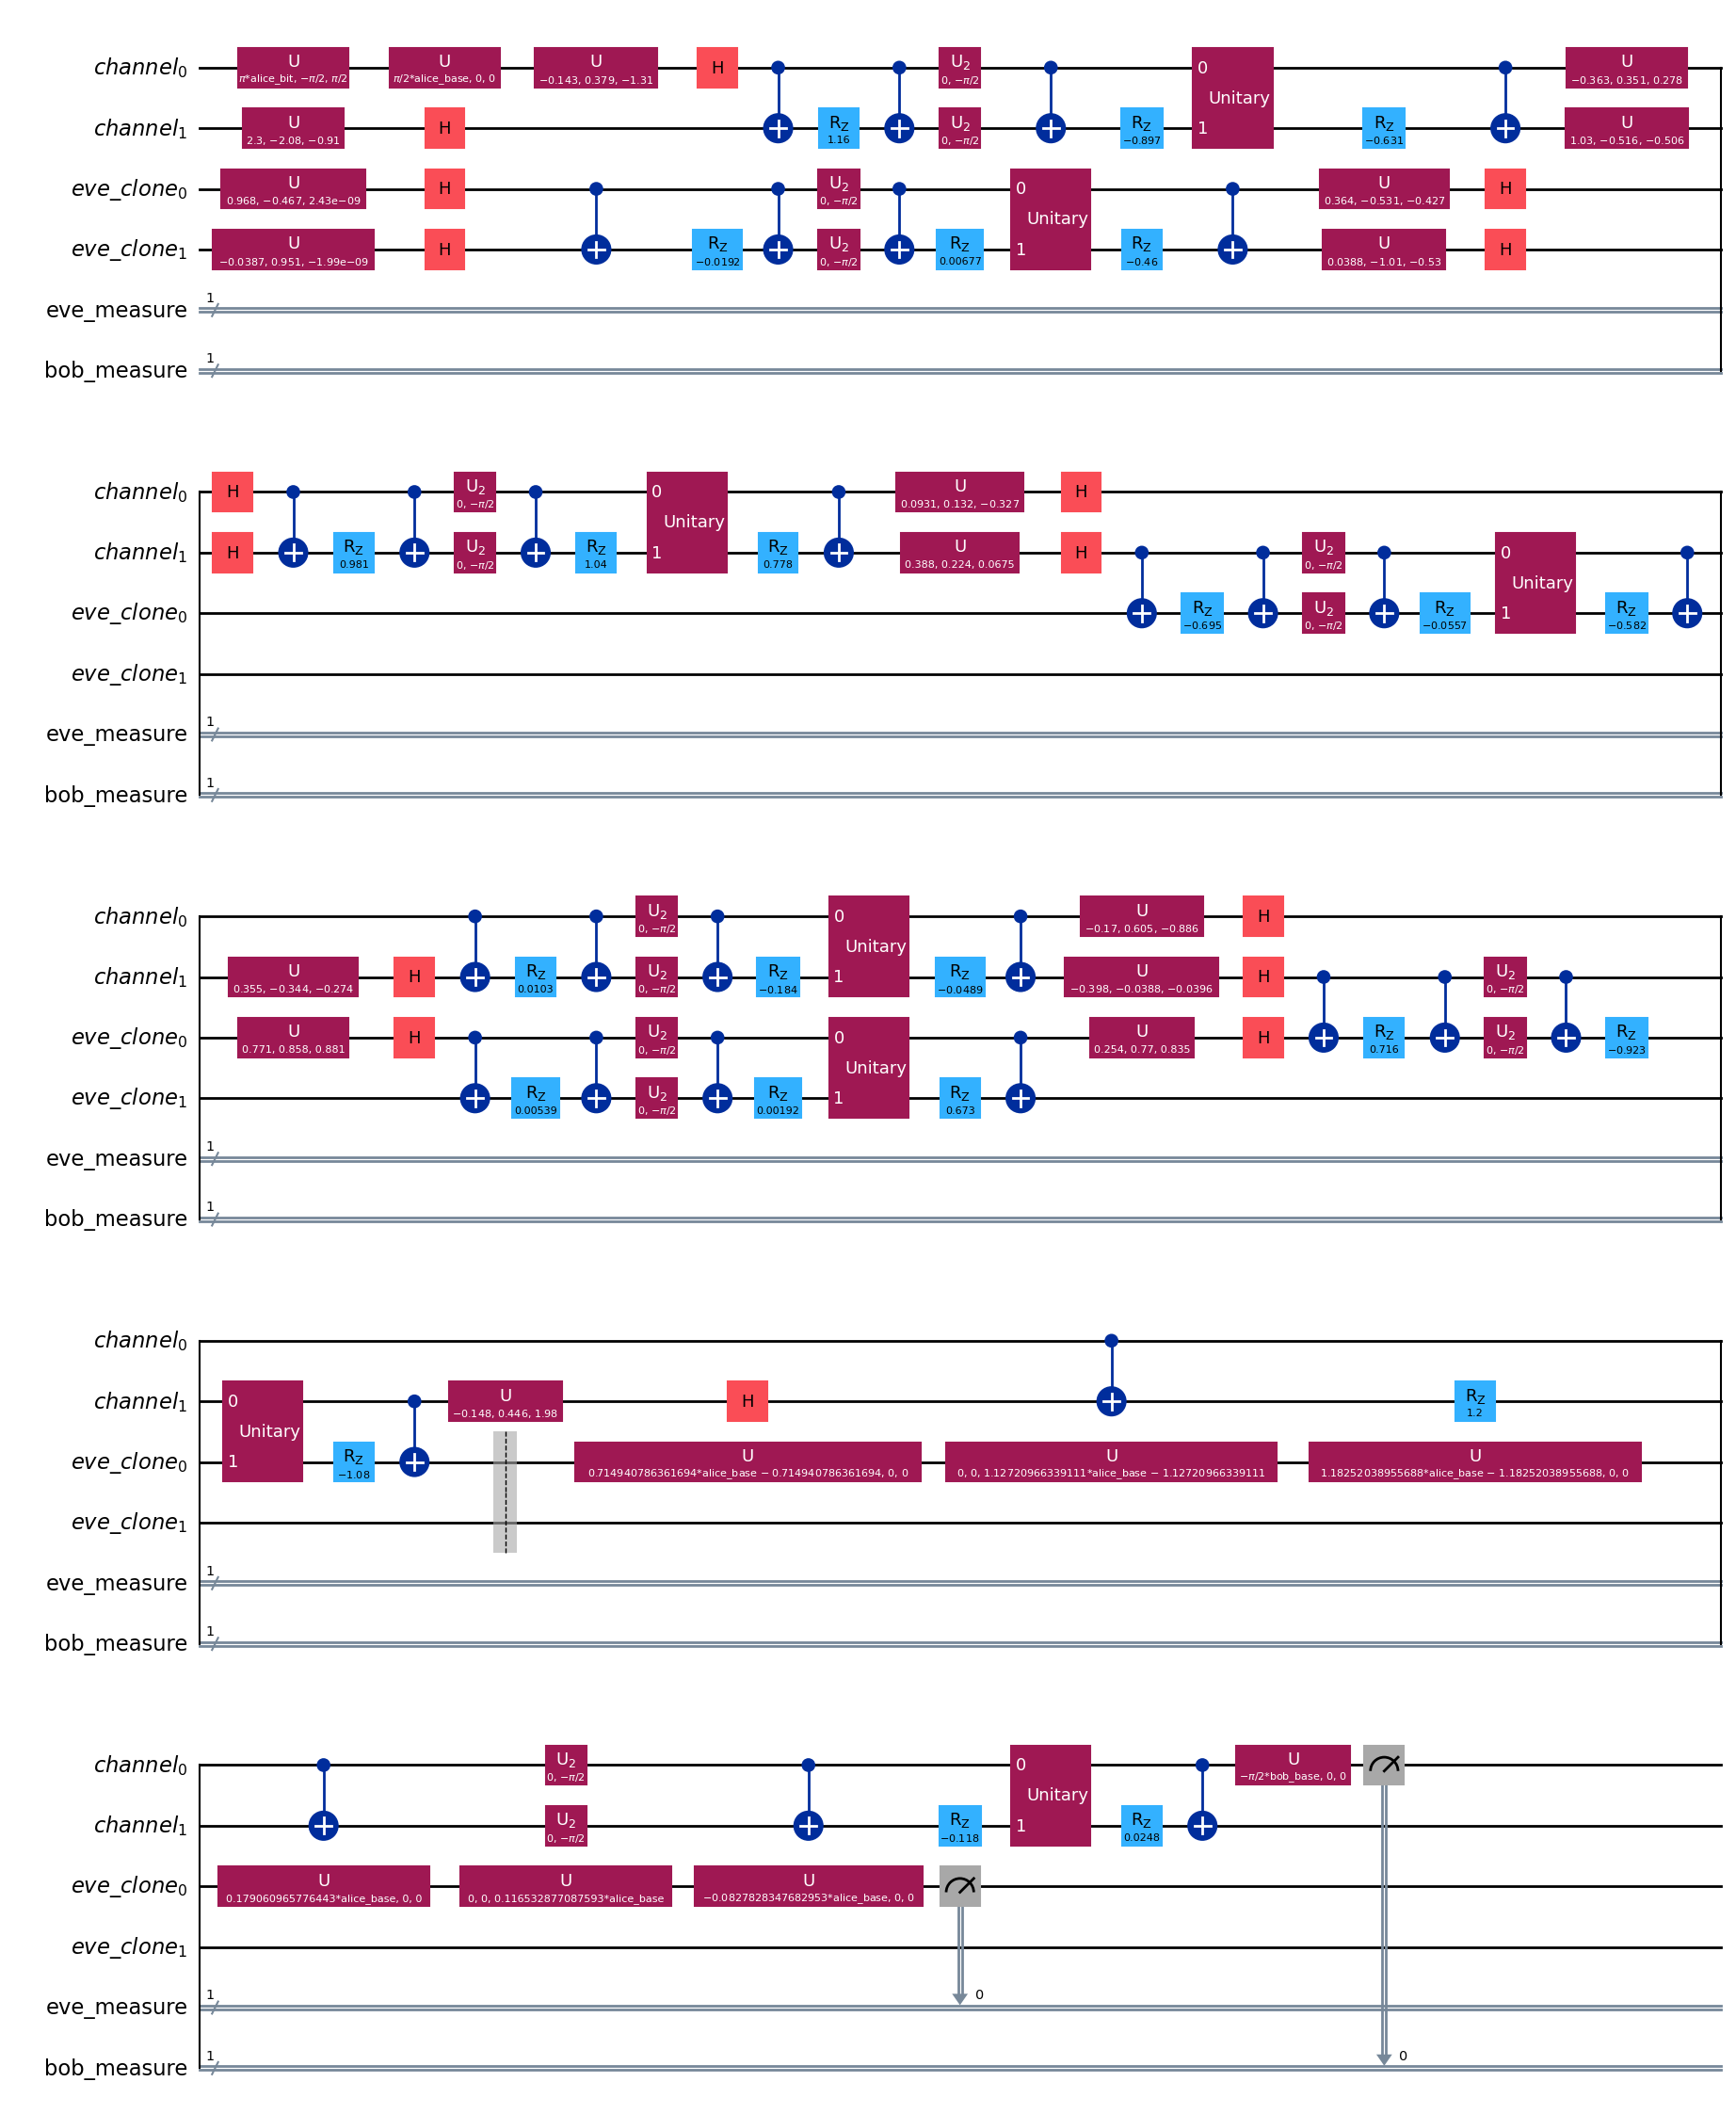

In [38]:
eve_protocol._qc.assign_parameters(eve_protocol.get_all_parameters()).draw("mpl")